# ANÁLISIS E INSIGHTS

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## CARGA DE DATOS

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_dis,accomodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1 shared bath,1.0,1.0,80,4.87,4.89,4.77,5098,60.0,50,01_Una,0-3,0-2,24-170,50,178430.0,5.255932
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1 bath,1.0,1.0,33,4.58,4.82,4.21,2267,31.0,0,01_Una,0-3,0-2,24-170,50,79345.0,4.097245
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,2 baths,3.0,5.0,0,NaN,NaN,NaN,4085,50.0,39,03_Tres,5-16,5-24,0-23,90,257355.0,3.257953
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1 bath,1.0,1.0,12,4.92,5.00,5.00,4827,92.0,68,01_Una,0-3,0-2,0-23,50,168945.0,0.601064
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1 private bath,1.0,1.0,149,4.68,4.71,4.70,4085,26.0,4,01_Una,0-3,0-2,24-170,50,142975.0,3.280414


## ANALISIS

### Análisis sobre el precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [3]:
df.precio_total.describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: precio_total, dtype: float64

Existe un atípico por la parte de arriba que sesga la media, por tanto se usará la mediana como medida de centralización más fiable.

In [4]:
df.precio_total.median()

70.0

In [8]:
df.groupby('neighbourhood_group')['precio_total'].median().sort_values(ascending=False)

neighbourhood_group
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: precio_total, dtype: float64

Llama la atención el dato de San Blas, se analizará con más detalle a ver qué está pasando.

In [9]:
df.loc[df.neighbourhood_group=='San Blas - Canillejas'].sort_values('precio_total',ascending=False)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_dis,accomodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,1 shared bath,3.0,5.0,0,NaN,NaN,NaN,2591,9800.0,100,03_Tres,5-16,5-24,0-23,90,163233.0,9.020778
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,1.5 shared baths,2.0,3.0,0,NaN,NaN,NaN,2591,6300.0,75,02_Dos,4,3-4,0-23,70,126959.0,8.909455
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,2 baths,4.0,5.0,0,NaN,NaN,NaN,2591,6000.0,0,04_Cuatro_o_mas,5-16,5-24,0-23,120,217644.0,9.596510
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2 baths,2.0,3.0,0,NaN,NaN,NaN,2591,5670.0,100,02_Dos,5-16,3-4,0-23,70,126959.0,10.044138
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,4 baths,5.0,8.0,0,NaN,NaN,NaN,2591,4480.0,75,04_Cuatro_o_mas,5-16,5-24,0-23,150,272055.0,9.239597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,3527,3527,16542257,Habitación para corta estancia. Wanda Metropol...,108860717,San Blas - Canillejas,Simancas,40.42960,-3.62345,Private room,20,1,1,0,Lugares de interés: Ubicada a tan sólo 15 anda...,f,1,1 shared bath,1.0,1.0,106,4.72,4.83,4.59,2591,20.0,100,01_Una,0-3,0-2,24-170,50,90685.0,8.247368
10789,10789,10789,36305725,Lo mejor de Canillejas,273037515,San Blas - Canillejas,Canillejas,40.44752,-3.61102,Private room,20,1,1,0,Metro a 2 min andando<br />Wanda metropolitano...,f,1,1 shared bath,1.0,1.0,3,5.00,5.00,5.00,2591,20.0,100,01_Una,0-3,0-2,0-23,50,90685.0,10.024907
10011,10011,10011,35039314,"Hab privad, IFEMA,Wanda,aeropuerto,metro al ce...",263951333,San Blas - Canillejas,Canillejas,40.44901,-3.60807,Private room,20,1,2,269,habitación privada para 1 persona cama de 9...,t,2,1 shared bath,1.0,1.0,66,4.92,4.98,4.97,2591,20.0,26,01_Una,0-3,0-2,24-170,50,90685.0,10.367426
14671,14671,14671,45679625,Habitación individual disponible,179180085,San Blas - Canillejas,Amposta,40.42499,-3.62308,Private room,20,1,1,363,None,f,1,1 shared bath,1.0,1.0,0,NaN,NaN,NaN,2591,20.0,0,01_Una,0-3,0-2,0-23,50,90685.0,8.203153


Se observa que son precios en el entorno de los 3.000 - 5.000 euros.

Al leer la descripción se observa que todos estos precios están definidos por la final de la Champions League.

Lo cual es un insight interesante: 

**Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos**

¿Tendría sentido generar un producto de alquiler que consista en alquilar de forma "normal" a un precio inferior al mercado con la condición de que el inquilino deje el piso libre para alquilarlo "turísticamente" en fechas señaladas?

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín a la cabeza.

Pero por ejemplo se observa que la diferencia de precio media entre Retiro y Tetuán es muy baja.

Esto lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

In [15]:
temp = df.groupby('neighbourhood_group')[['precio_total','precio_compra']].median().sort_values('precio_total',ascending=False)
temp

,precio_total,precio_compra
neighbourhood_group,,
San Blas - Canillejas,90.0,90685.0
Salamanca,88.0,213990.0
Centro,76.0,168945.0
Chamartín,74.0,178430.0
Chamberí,70.0,188335.0
Hortaleza,69.0,135485.0
Retiro,68.0,167580.0
Tetuán,66.0,128730.0
Moncloa - Aravaca,61.0,141155.0


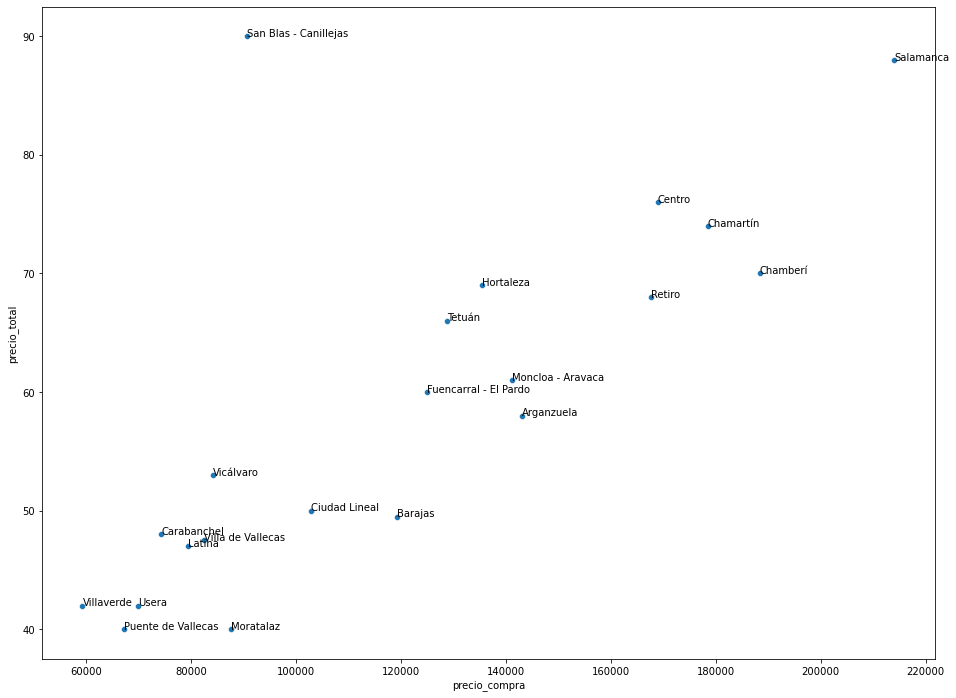

In [11]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=temp,x='precio_compra',y='precio_total')

for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada],temp.precio_total[cada],temp.index[cada])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que la compañía podrá cobrar por noche.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Y la excepción de San Blas que ya se ha identificado el motivo.

Por tanto como era esperable no hay a priori ningún "chollo" claro a este nivel.

Vamos a repetir el análisis a nivel de barrio a ver se identifican nuevos insights.

In [17]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median().sort_values('precio_total',ascending=False)
temp

,precio_total,precio_compra
neighbourhood,,
Rosas,367.5,90685.0
Arcos,250.0,90685.0
Canillejas,250.0,90685.0
Hellín,197.5,90685.0
El Plantío,128.8,141155.0
...,...,...
Entrevías,35.0,67130.0
Pavones,32.0,87500.0
Fontarrón,31.1,87500.0


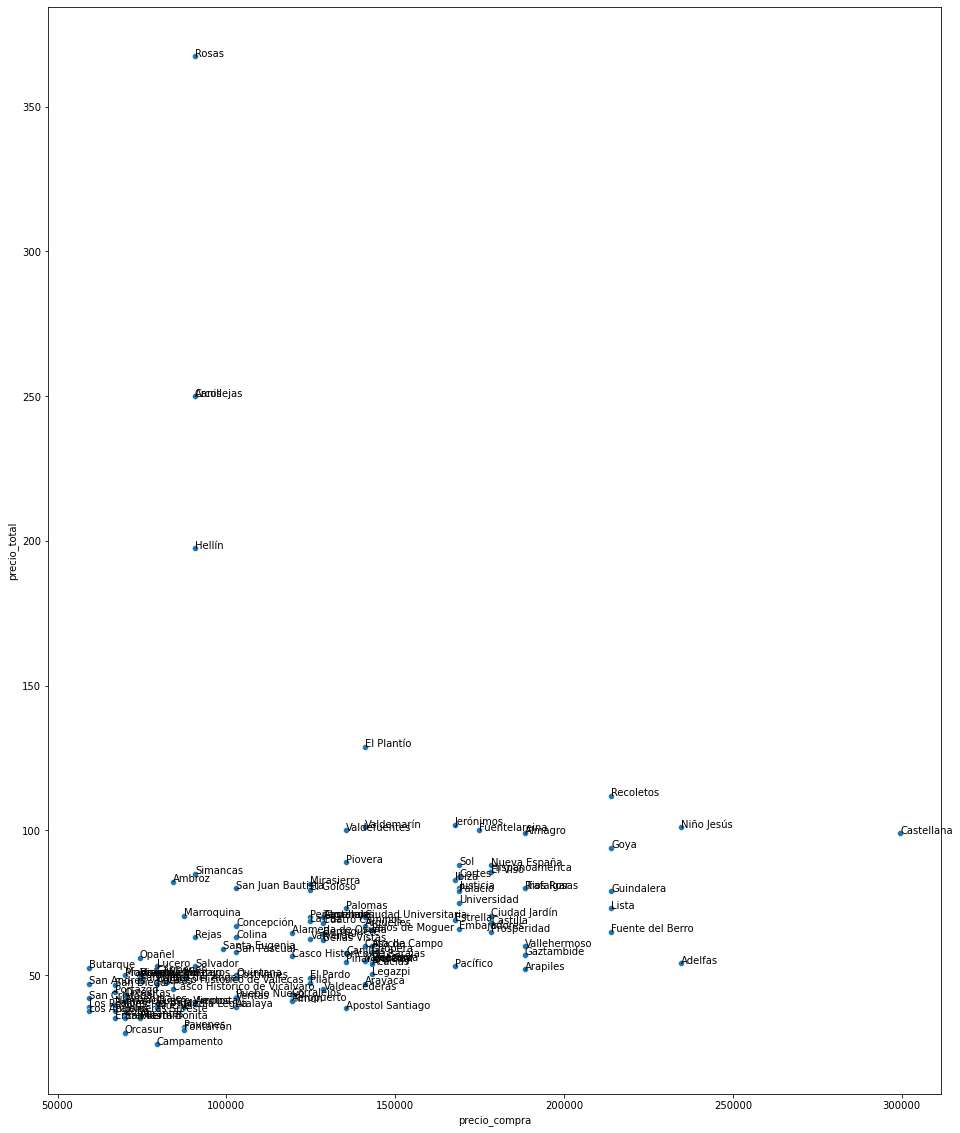

In [21]:
plt.figure(figsize=(16,20))
sns.scatterplot(data=temp,x='precio_compra',y='precio_total')

for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada],temp.precio_total[cada],temp.index[cada])

Se observa que:

* 3 barrios que sobresalen, posiblemente los 3 sean de San Blas
* Dentro de cada grupo de bajo-medio-alto pueden localizarse barrios interesantes:
    * Bajo: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Medio: El Plantio, Valdemarín, Valdefuentes
    * Medio-alto: Jerónimos, Fuentela reina
    * Alto: Recoletos
    
**Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

In [26]:
df.loc[df.neighbourhood.isin(['Rosas','Cannillejas','Hellin']),'neighbourhood_group'].unique()

array(['San Blas - Canillejas'], dtype=object)

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

In [40]:
df.rename(columns={'bedrooms_dis':'bedrooms_disc'},inplace=True)

In [41]:
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accomodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones+metricas]
minicubo_precio

,bedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,precio_total,precio_compra
0,01_Una,0-3,0-2,24-170,60.0,178430.0
1,01_Una,0-3,0-2,24-170,31.0,79345.0
2,03_Tres,5-16,5-24,0-23,50.0,257355.0
3,01_Una,0-3,0-2,0-23,92.0,168945.0
4,01_Una,0-3,0-2,24-170,26.0,142975.0
...,...,...,...,...,...,...
17705,01_Una,0-3,0-2,0-23,29.0,168945.0
17706,01_Una,0-3,0-2,0-23,29.0,168945.0
17707,01_Una,0-3,0-2,0-23,29.0,168945.0
17708,01_Una,0-3,0-2,0-23,29.0,213990.0


In [42]:
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,60.0,178430.0,bedrooms_disc,01_Una
1,31.0,79345.0,bedrooms_disc,01_Una
2,50.0,257355.0,bedrooms_disc,03_Tres
3,92.0,168945.0,bedrooms_disc,01_Una
4,26.0,142975.0,bedrooms_disc,01_Una
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_disc,0-23
70836,29.0,168945.0,number_of_reviews_disc,0-23
70837,29.0,168945.0,number_of_reviews_disc,0-23
70838,29.0,213990.0,number_of_reviews_disc,0-23


In [43]:
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                       
accomodates_disc       0-3                      50.0       168945.0
                       4                        86.0       168945.0
                       5-16                    126.0       236523.0
bedrooms_disc          01_Una                   56.0       168945.0
                       02_Dos                  100.0       236523.0
                       03_Tres                 140.0       304101.0
                       04_Cuatro_o_mas         204.0       405468.0
beds_disc              0-2                      59.0       168945.0
                       3-4                     107.0       236523.0
                       5-24                    164.0       304101.0
number_of_reviews_disc 0-23                     70.0       168945.0
                       171-744                  62.0       168945.0
                       24-170                   70.0       168945.0

Sobre el minicubo se analizará cada variable.

In [44]:
minicubo_precio.loc['bedrooms_disc']

,precio_total,precio_compra
value,,
01_Una,56.0,168945.0
02_Dos,100.0,236523.0
03_Tres,140.0,304101.0
04_Cuatro_o_mas,204.0,405468.0


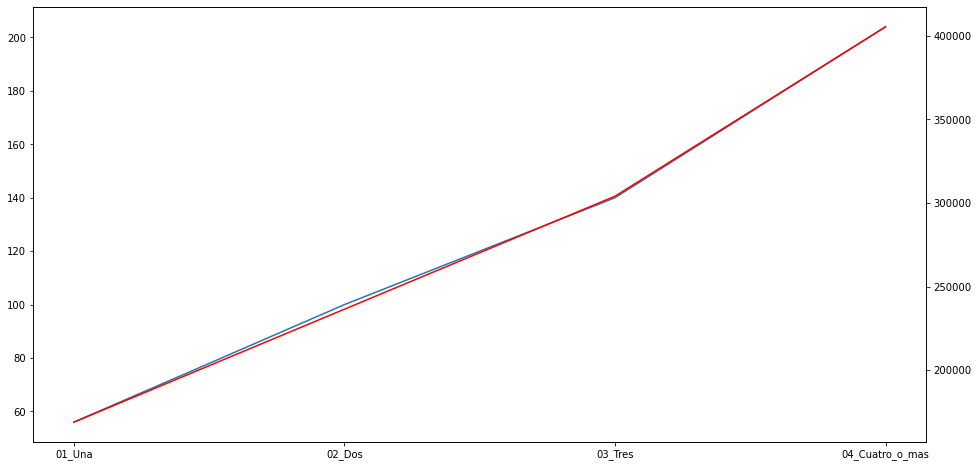

In [45]:
f, ax = plt.subplots(figsize=(16,8))
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color='r');

En cuanto al número de habitaciones no hay nada que destacar.

Existe una relación casi perfecta entre el precio de compra y el precio total que se puede cobrar.

Parte de este efecto puede ser artificial, ya que se usó el número de habitaciones para calcular el precio total como el precio de compra.

In [46]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
0-2,59.0,168945.0
3-4,107.0,236523.0
5-24,164.0,304101.0


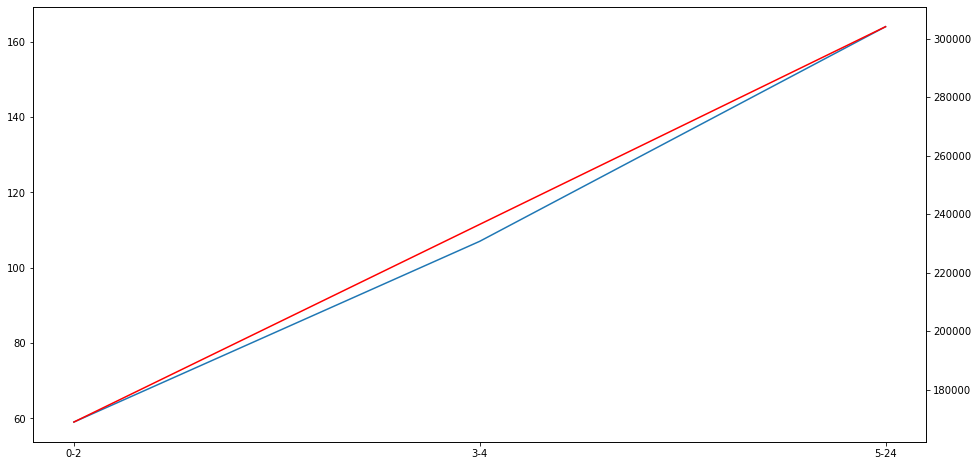

In [47]:
f, ax = plt.subplots(figsize=(16,8))
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color='r');

En cuanto al número de camas sí hay una conclusión:

**Insight 3: el número de camas a evitar es 2**. O bien ponemos una cama o bien se intentamos meter todas las posibles.

Dado que no había este efecto en el número de habitaciones ¿podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

Análisis con los pisos de una habitación:

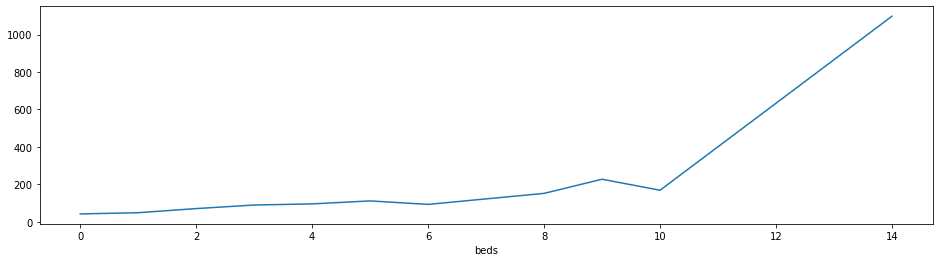

In [49]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot(figsize=(16,4));

Efectivamente se observa que para pisos de una habitación hay propietarios que está metiendo hasta decenas de camas.

Sería interesante explorar con más detalle y comentarlo con con algún encargado de negocio de la compañía.

Ejemplos:

In [50]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
357,357,357,1044902,Masía el Ferrajón,5751753,Moncloa - Aravaca,Ciudad Universitaria,40.46549,-3.75115,Private room,112,2,1,0,<b>The space</b><br />Masía el Ferrajón featur...,f,16,None,1.0,14.0,0,NaN,NaN,NaN,4033,1097.6,100,01_Una,5-16,5-24,0-23,50,141155.0,7.307431
605,605,605,2143824,The Hat Madrid - 10 people shared,10940437,Centro,Sol,40.41511,-3.70804,Shared room,24,1,6,364,10 people shared room with shared bathroom. <b...,t,10,0 shared baths,1.0,10.0,91,4.57,4.69,4.84,4827,168.0,0,01_Una,5-16,5-24,24-170,50,168945.0,0.509284
710,710,710,3011110,The Hat Madrid-Compartida 10 pers 2,10940437,Centro,Embajadores,40.41311,-3.70621,Shared room,24,1,6,364,The Hat Madrid es el primer Boutique Hostel de...,t,10,0 shared baths,1.0,10.0,28,4.56,4.81,4.93,4827,168.0,0,01_Una,5-16,5-24,24-170,50,168945.0,0.496502
11848,11848,11848,39600798,Bed in a 10-Bed Dormitory In the Centre of Madrid,304035848,Centro,Justicia,40.42710,-3.69912,Shared room,20,1,13,351,"Low-key, hostel-style setup on a tree-lined st...",f,1,1 shared bath,1.0,10.0,2,5.00,5.00,5.00,4827,140.0,3,01_Una,0-3,5-24,0-23,50,168945.0,1.230730
13340,13340,13340,42492960,Apartamento dúplex 10camas en literas,338384437,Tetuán,Cuatro Caminos,40.44959,-3.70138,Private room,298,1,1,364,Vivienda en planta baja con 10 plazas distribu...,f,10,1 private bath,1.0,10.0,1,5.00,4.00,5.00,3678,2086.0,0,01_Una,5-16,5-24,0-23,50,128730.0,3.660609
15722,15722,15722,48855617,"habitaciones en una casa tranquila, en el centro",194738186,Salamanca,Fuente del Berro,40.42604,-3.66373,Private room,36,2,1,359,Es una casa que tiene dos habitaciones que se ...,f,5,3 shared baths,1.0,9.0,0,NaN,NaN,NaN,6114,226.8,1,01_Una,5-16,5-24,0-23,50,213990.0,4.154978


Análisis por el número de huéspedes que aceptan.

In [52]:
minicubo_precio.loc['accomodates_disc']

,precio_total,precio_compra
value,,
0-3,50.0,168945.0
4,86.0,168945.0
5-16,126.0,236523.0


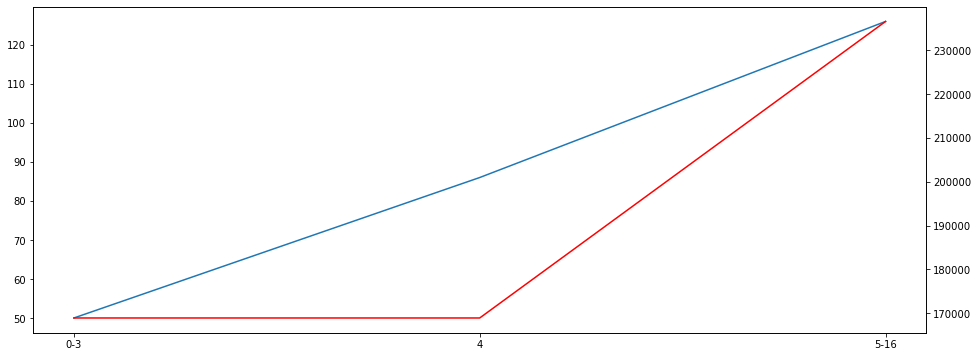

In [54]:
f, ax = plt.subplots(figsize=(16,6))
ax.plot(minicubo_precio.loc['accomodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accomodates_disc'].precio_compra,color='r');

**Insight 4: el número óptimo de huéspedes está en 3, ya el precio de los inmuebles para acomodar 3 es el mismo que para acomodar 1 o 2. A partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante**

Por último se analizará la variable de cercanía a punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

En una situación real se construían muchas más variables de este tipo, y se repetiría el análisis con todas.

En este caso solo se va a evaluar solo los distritos para los que la distancia a la puerta del sol puede ser relevante, es decir los más céntricos.

Para ello se calculará primero la distancia media por distrito y se elegirá un punto de corte.

In [55]:
df.groupby('neighbourhood_group')['pdi_sol'].median().sort_values()

neighbourhood_group
Centro                    0.775092
Arganzuela                1.904735
Chamberí                  2.114980
Moncloa - Aravaca         2.326139
Retiro                    2.842331
Salamanca                 3.046149
Usera                     3.672816
Carabanchel               3.898379
Latina                    4.097663
Chamartín                 4.575254
Tetuán                    4.593903
Puente de Vallecas        4.743488
Ciudad Lineal             5.992618
Moratalaz                 6.159646
Villaverde                7.632088
Fuencarral - El Pardo     7.795438
Hortaleza                 8.739380
San Blas - Canillejas     9.459148
Vicálvaro                 9.973921
Villa de Vallecas        10.144708
Barajas                  13.445077
Name: pdi_sol, dtype: float64

Se cortará en Latina incluído.

In [56]:
seleccion = df.groupby('neighbourhood_group')['pdi_sol'].median().sort_values()[0:6].index.to_list()

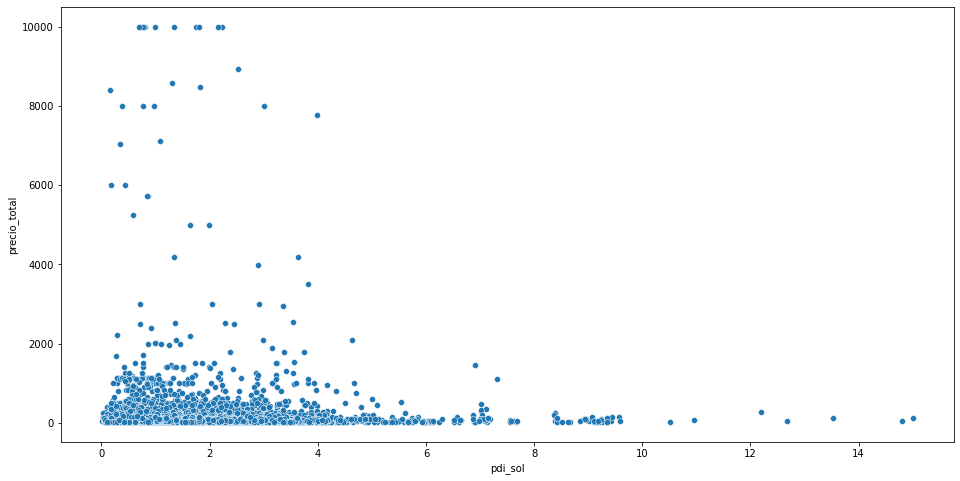

In [59]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df.loc[df.neighbourhood_group.isin(seleccion)],x='pdi_sol',y='precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 5: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del PdI y por tanto esperablmente tengan un precio de compra menor**

### Analisis sobre la ocupación

Para este punto se podrían repetir exactamente los mismos análisis que con el precio pero cambiando la variable precio por la de ocupación.

### Analisis geográfico sobre un mapa

Se empleará el paquete Folium, una implementación de la tecnología Leaflet en Python.

Lo único que se necesita es tener las coordenadas de latitud y longitud.

Instalación (en terminal):
```
conda install -c conda-forge folium
```

In [62]:
import folium

Con folium no es necesario instalar mapas, ya los trae por defecto, lo único que tenemos que hacer para inicializar un mapa es pasarle las coordenadas de inicio y opcionalmente un nivel de zoom.

In [60]:
datos = df[df.neighbourhood_group=='San Blas - Canillejas'].copy()

In [63]:
mapa = folium.Map(location = [40.4167278,-3.7033387],control_scale=True,zoom_start=12)

Se crea una nueva variable discretizada para añadir el marcador a un círculo de colores.

In [64]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'],[0,0.25,0.5,0.75,1],labels=['blue','yellow','orange','red'])

In [78]:
mapa = folium.Map(location = [40.43893, -3.61537],control_scale=True,zoom_start=13.4)

for piso in range(0,len(datos)):
    folium.CircleMarker(location = [datos.iloc[piso]['latitude'],datos.iloc[piso]['longitude']],
                        popup = datos.iloc[piso]['precio_total'],
                        fill=True,
                        radius=2,
                        color=datos.iloc[piso]['precio_total_disc'],
                        fill_opacity = 1).add_to(mapa)
    
mapa

**Insight 6: Existen todavía muchos inmuebles amarillos y rojos, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos**